In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from arch.unitroot import DFGLS
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('price_panel_daily.csv',index_col=0)
df.head()

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,...,KRW-AXS,KRW-STX,KRW-XEC,KRW-SOL,KRW-MATIC,KRW-NU,KRW-AAVE,KRW-1INCH,KRW-ALGO,KRW-NEAR
2017-09-25 09:00:00,4322000.0,325000.0,28600.0,9800.0,57300.0,203.0,12100.0,11050.0,25.3,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4321000.0,321500.0,29300.0,9970.0,58000.0,211.0,12850.0,10850.0,30.2,5350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27 09:00:00,4657000.0,342500.0,35200.0,10450.0,62800.0,232.0,14250.0,11500.0,31.9,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28 09:00:00,4586000.0,332500.0,32500.0,9980.0,60100.0,222.0,14500.0,11450.0,31.4,5180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 09:00:00,4657000.0,327500.0,31850.0,9520.0,59100.0,220.0,14150.0,10850.0,30.7,5530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


사용할 함수들

In [4]:
def E_Gtest(y,x):
    return coint(y,x,maxlag=12)[0]


def get_spread(y,x):
    results=sm.OLS(y,x).fit()
    spread=results.resid
    spread=pd.Series(spread,name='spread')
    return spread

def adf_test(x,cutoff=0.01):
    pvalue=adfuller(x)[1]
    if pvalue<cutoff:
        print('stationary')
    else:
        print('no')


def find_distance(a,b):
    dist=np.linalg.norm(a-b)
    return dist
    
def mm_scaler(df):
    for i in df.columns:
        df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))
    return df

In [5]:
df_new=df.iloc[:,0:20].copy()
df1=df_new[0:900].copy()
df2=df_new[900:].copy()
df1_scaled=mm_scaler(df1)
df2_scaled=mm_scaler(df2)
df1_scaled.head()

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,KRW-XEM,KRW-QTUM,KRW-LSK,KRW-STEEM,KRW-XLM,KRW-ARDR,KRW-ARK,KRW-STORJ,KRW-GRS,KRW-REP
2017-09-25 09:00:00,0.029507,0.112598,0.089685,0.594779,0.076184,0.005713,0.138844,0.255309,0.015809,0.178175,0.077694,0.084934,0.111376,0.097285,0.000000,0.049341,0.218189,0.104741,0.019585,0.087966
2017-09-26 09:00:00,0.029465,0.110889,0.092498,0.605296,0.077895,0.007617,0.151692,0.250449,0.021151,0.211120,0.076635,0.086798,0.111562,0.096833,0.000580,0.049341,0.203173,0.109452,0.021631,0.090715
2017-09-27 09:00:00,0.043568,0.121145,0.116205,0.634991,0.089631,0.012616,0.175675,0.266242,0.023005,0.227367,0.082281,0.091926,0.115659,0.108597,0.002320,0.076360,0.222106,0.120522,0.024847,0.102932
2017-09-28 09:00:00,0.040588,0.116261,0.105356,0.605914,0.083030,0.010236,0.179957,0.265027,0.022460,0.203448,0.078752,0.093791,0.106907,0.129412,0.001657,0.067215,0.202520,0.115340,0.019877,0.111484
2017-09-29 09:00:00,0.043568,0.113819,0.102744,0.577456,0.080585,0.009760,0.173961,0.250449,0.021696,0.219244,0.081575,0.090994,0.103555,0.155204,0.001326,0.068462,0.192074,0.109687,0.015493,0.102627


20개 코인을 이용하여 pairs를 구하고 각 pairs 중에서 distance가 가장 짧은 pairs를 구한다

In [6]:
columns=list(df1.columns)
pair=dict()
for coin in columns:
    del columns[columns.index(coin)]
    for i in columns:
        temp=df1[[coin,i]].copy()
        temp.dropna(inplace=True)
        pairs=[coin,i]
        dist=find_distance(temp[coin],temp[i])
        pair[dist]=pairs
    
key_list=list(pair.keys())
key_list=sorted(key_list)[0:5]
print(key_list)

[1.0965042183713298, 1.2022941575095258, 1.217321581184527, 1.2567625024809417, 1.2821935877748405]


In [7]:
pairs=[]
for i in key_list:
    print(pair[i])
    pairs.append(pair[i])
print(pairs)

['KRW-SNT', 'KRW-XEM']
['KRW-ARK', 'KRW-STORJ']
['KRW-SNT', 'KRW-XRP']
['KRW-XEM', 'KRW-QTUM']
['KRW-ARK', 'KRW-QTUM']
[['KRW-SNT', 'KRW-XEM'], ['KRW-ARK', 'KRW-STORJ'], ['KRW-SNT', 'KRW-XRP'], ['KRW-XEM', 'KRW-QTUM'], ['KRW-ARK', 'KRW-QTUM']]


각 코인들이 stationary한지 검정해보자

In [8]:
for pair in pairs:
    adf_test(df1[pair[0]].dropna())
    adf_test(df1[pair[1]].dropna())
    

no
no
no
no
no
stationary
no
no
no
no


XRP 가격이 stationary 하다는 가설을 기각하지 못함

In [9]:
for pair in pairs:
    coint_result=E_Gtest(df1[pair[0]].dropna(),df1[pair[1]].dropna())
    print(coint_result)

-5.222563792797611
-4.424008263252113
-5.989997424738529
-6.994245615435445
-4.810428323721689



 백테스팅 코드
 

In [11]:
def coint_backtest(df,pair1,pair2,spread,s=2):
    df=df[[pair1,pair2]]
    df=df.join(spread)

    df['spread_n']=(df['spread'].copy()-df['spread'].mean())/df['spread'].std()
    df['total']=df[pair1]+df[pair2]

    threshold1=df['spread_n'].std()*s+df['spread_n'].mean()
    threshold2=df['spread_n'].std()*-s+df['spread_n'].mean()

    df['position']=np.where(df['spread_n']>threshold1,-1,np.nan)
    df['position']=np.where(df['spread_n']<threshold2,1,df['position'])
    df['position']=np.where(df['spread_n']*df['spread_n'].shift(1)<0,0,df['position'])
    df['position']=df['position'].ffill().fillna(0)

    
    df['spread_return']=np.log(df['spread']/df['spread'].shift(1))
    df['t_return']=np.log(df['total']/df['total'].shift(1))
    df['strategy']=(df['spread_return'])*df['position'].shift(1)
    df.dropna(inplace=True)
    return df






In [12]:
result=coint_backtest(df=df2,pair1='KRW-XEM',pair2='KRW-QTUM',spread=spread)

이번 pair: ['KRW-SNT', 'KRW-XEM']
 0.0    554
-1.0     68
 1.0     30
Name: position, dtype: int64
t_return    96.628214
strategy     1.206437
dtype: float64

이번 pair: ['KRW-ARK', 'KRW-STORJ']
 0.0    491
-1.0     75
 1.0     37
Name: position, dtype: int64
t_return     6.616448
strategy    76.170760
dtype: float64

이번 pair: ['KRW-XEM', 'KRW-QTUM']
 0.0    563
-1.0     75
Name: position, dtype: int64
t_return    37.777570
strategy    11.050983
dtype: float64

이번 pair: ['KRW-ARK', 'KRW-QTUM']
 0.0    492
 1.0     55
-1.0     37
Name: position, dtype: int64
t_return      1.499203
strategy    174.985096
dtype: float64



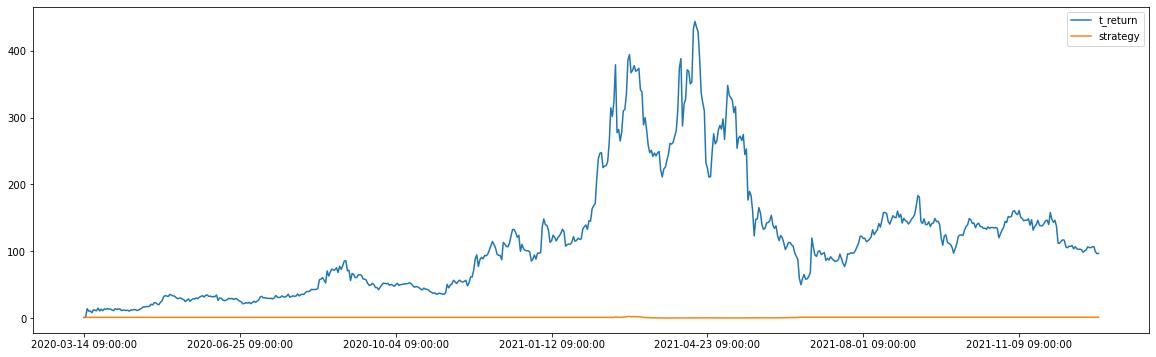

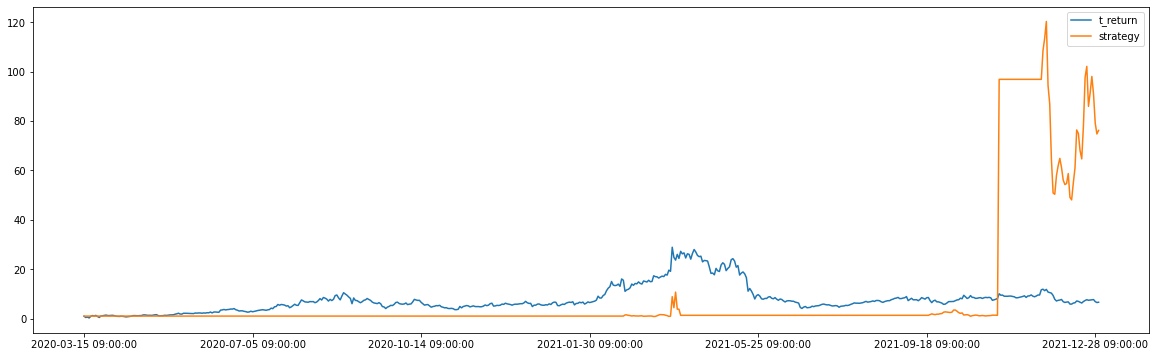

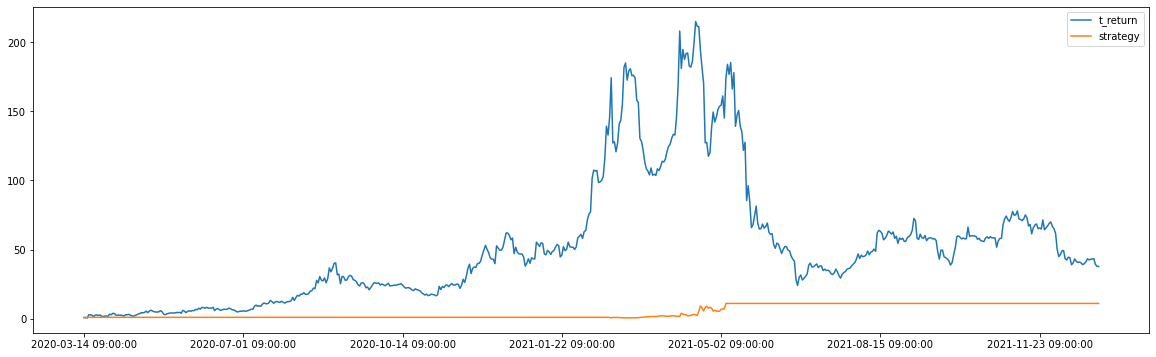

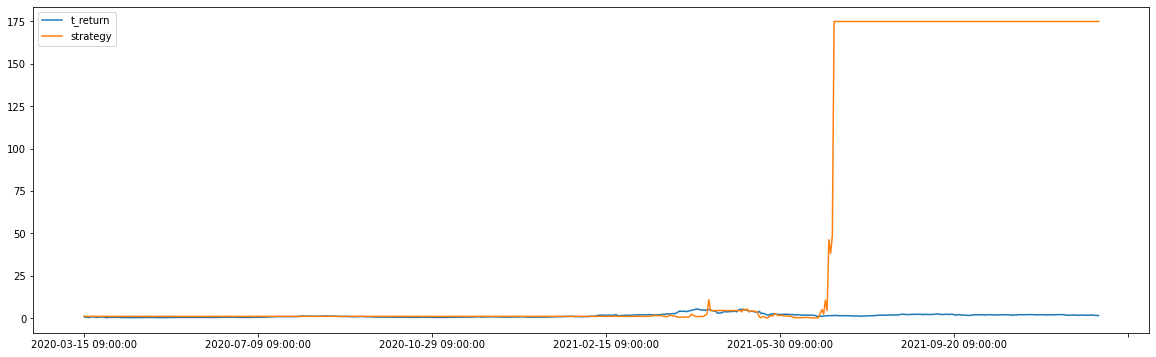

In [13]:
del pairs[2]
for pair in pairs:
    print(f'이번 pair: {pair}')
    spread=get_spread(df2[pair[0]],df2[pair[1]])
    spread=pd.Series(spread,name='spread')
    result=coint_backtest(df=df2,pair1=pair[0],pair2=pair[1],spread=spread)
    print(result['position'].value_counts())
    print(result[['t_return','strategy']].sum().apply(np.exp))
    result[['t_return','strategy']].cumsum().apply(np.exp).plot(figsize=(20,6))
    print()

